In [15]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

from sklearn.model_selection import train_test_split

# for yeo-johnson transformation
import scipy.stats as stats

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:

data = pd.read_csv('test.csv')

print(data.shape)
print(data.describe())
data.head()

(1459, 80)
                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Let's drop the Id column
data.drop('Id', axis=1, inplace=True)

## Let's perform the following operations
1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Put the variables in a similar scale

In [5]:
# First, Missing values
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [11]:
# Let's convert MSSubClass to object as in the last one

data['MSSubClass'] = data['MSSubClass'].astype('O')

# Now let's bring the data we coded before

# To be imputed with the sting 'Missing'
with_string_missing = ['Alley', 'FireplaceQu',
                       'PoolQC', 'Fence', 'MiscFeature']
data[with_string_missing] = data[with_string_missing].fillna('Missing')

# To be replaced with the mode after encoding.
with_frequent_category = {
    'MasVnrType': 'None',
    'BsmtQual': 'TA',
    'BsmtCond': 'TA',
    'BsmtExposure': 'No',
    'BsmtFinType1': 'Unf',
    'BsmtFinType2': 'Unf',
    'Electrical': 'SBrkr',
    'GarageType': 'Attchd',
    'GarageFinish': 'Unf',
    'GarageQual': 'TA',
    'GarageCond': 'TA',
}
for var in with_frequent_category.keys():
    data[var].fillna(with_frequent_category[var], inplace=True)

In [12]:
# For numerical variables, we encode it from the last notebook as follows
num_vars_with_na = {
    'LotFrontage': 69.87974098057354,
    'MasVnrArea': 103.7974006116208,
    'GarageYrBlt': 1978.2959677419356,
}
# And replace add missing indicator, then replace missing with mean

for var in num_vars_with_na: # looping through the dictionary keys. Same as num_vars_with_na.keys():
    
    # Add missing indicator
    data[var + '_na'] = np.where(data[var].isnull(), 1,0)
    
    # Replace na with mean
    data[var].fillna(num_vars_with_na[var], inplace=True)
    
# verify that there is no missing value
data[num_vars_with_na].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [13]:
# Now, we capture the difference between variable and year sold, then drop YrSold

def elapsed_years(df, var):
    """capture difference between the year variable and the year in which the house was sold"""
    df[var] = df['YrSold'] - df[var]
    return df
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data = elapsed_years(data, var)

# Drop Yr Sold
data.drop(['YrSold'], axis=1, inplace=True)

In [16]:
# Let's log transform our numerical variables
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    data[var] = np.log(data[var])

# Now, we apply yeojohnson transformation to log area using the lmbda we learned previously
data['LotArea'] = stats.yeojohnson(data['LotArea'], lmbda=-12.55283001172003)

# Now, the skewed variable we identified early, let's apply the same binary mapping
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    # map the variable values into 0 and 1
    data[var] = np.where(data[var]==0, 0, 1)

In [17]:
# Let's as before remap each variable that are norminal to numbers

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for var in qual_vars:
    data[var] = data[var].map(qual_mappings)
    
    
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)
    
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [20]:
# Now, let's confirm that there is no missing value in the entire testing dataset
with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
with_na

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [22]:
# We have quite a good number of missing data
# did those have missing data in the train set?

[var for var in with_na if var in list(
    with_frequent_category.keys())+with_string_missing+list(num_vars_with_na.keys())]

[]

**IMPORTANT**

In the new data, we have a bunch of variables that contain missing information, that we did not anticipate.

### Removing Rare Labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations into a "Rare" string.

In [25]:
# create a dictionary with the most frequent categories per variable

# note the amount of hard coding that I need to do.

# Can you think of an alternative? Perhaps we could have save this as a numpy pickle
# and load it here, instead of hard-coding.

# But that means that we need to go back to the Feature Engineering notebook, and change
# the code so that we store the pickle. So there is still some code changes that we need

frequent_ls = {
    'MSZoning': ['FV', 'RH', 'RL', 'RM'],
    'Street': ['Pave'],
    'Alley': ['Grvl', 'Missing', 'Pave'],
    'LotShape': ['IR1', 'IR2', 'Reg'],
    'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'],
    'Utilities': ['AllPub'],
    'LotConfig': ['Corner', 'CulDSac', 'FR2', 'Inside'],
    'LandSlope': ['Gtl', 'Mod'],
    'Neighborhood': ['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
                     'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
                     'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
                     'Somerst', 'StoneBr', 'Timber'],

    'Condition1': ['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'],
    'Condition2': ['Norm'],
    'BldgType': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
    'HouseStyle': ['1.5Fin', '1Story', '2Story', 'SFoyer', 'SLvl'],
    'RoofStyle': ['Gable', 'Hip'],
    'RoofMatl': ['CompShg'],
    'Exterior1st': ['AsbShng', 'BrkFace', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood',
                    'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],

    'Exterior2nd': ['AsbShng', 'BrkFace', 'CmentBd', 'HdBoard', 'MetalSd', 'Plywood',
                    'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],

    'MasVnrType': ['BrkFace', 'None', 'Stone'],
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab'],
    'Heating': ['GasA', 'GasW'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['FuseA', 'FuseF', 'SBrkr'],
    'Functional': ['Min1', 'Min2', 'Mod', 'Typ'],
    'GarageType': ['Attchd', 'Basment', 'BuiltIn', 'Detchd'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['Missing'],
    'MiscFeature': ['Missing', 'Shed'],
    'SaleType': ['COD', 'New', 'WD'],
    'SaleCondition': ['Abnorml', 'Family', 'Normal', 'Partial'],
    'MSSubClass': ['20', '30', '50', '60', '70', '75', '80', '85', '90', '120', '160', '190'],
}

for var in frequent_ls.keys():
    
    # replace rare categories by the string "Rare"
    data[var] = np.where(data[var].isin(
        frequent_ls), data[var], 'Rare')

### Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. 

In [27]:
# we need the mappings learned from the train set. Otherwise, our model is going
# to produce inaccurate results

# note the amount of hard coding that we need to do.

# Can you think of an alternative? 

# Perhaps we could have save this as a numpy pickle
# and load it here, instead of hard-coding.

# But that means that we need to go back to the Feature Engineering notebook, and change
# the code so that we store the pickle. So there is still some code changes that we need

ordinal_mappings = {
    'MSZoning': {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4},
    'Street': {'Rare': 0, 'Pave': 1},
    'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2},
    'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3},
    'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
    'Utilities': {'Rare': 0, 'AllPub': 1},
    'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4},
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Rare': 2},
    'Neighborhood': {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3,
                     'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7,
                     'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11,
                     'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15,
                     'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19,
                     'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22},
    
    'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5},
    'Condition2': {'Rare': 0, 'Norm': 1},
    'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4},
    'HouseStyle': {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5},
    'RoofStyle': {'Gable': 0, 'Rare': 1, 'Hip': 2},
    'RoofMatl': {'CompShg': 0, 'Rare': 1},
    'Exterior1st': {'AsbShng': 0, 'Wd Sdng': 1, 'WdShing': 2, 'MetalSd': 3,
                    'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7,
                    'BrkFace': 8, 'CemntBd': 9, 'VinylSd': 10},
    
    'Exterior2nd': {'AsbShng': 0, 'Wd Sdng': 1, 'MetalSd': 2, 'Wd Shng': 3,
                    'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7,
                    'BrkFace': 8, 'CmentBd': 9, 'VinylSd': 10},
    
    'MasVnrType': {'Rare': 0, 'None': 1, 'BrkFace': 2, 'Stone': 3},
    'Foundation': {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Rare': 3, 'PConc': 4},
    'Heating': {'Rare': 0, 'GasW': 1, 'GasA': 2},
    'CentralAir': {'N': 0, 'Y': 1},
    'Electrical': {'Rare': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3},
    'Functional': {'Rare': 0, 'Min2': 1, 'Mod': 2, 'Min1': 3, 'Typ': 4},
    'GarageType': {'Rare': 0, 'Detchd': 1, 'Basment': 2, 'Attchd': 3, 'BuiltIn': 4},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'PoolQC': {'Missing': 0, 'Rare': 1},
    'MiscFeature': {'Rare': 0, 'Shed': 1, 'Missing': 2},
    'SaleType': {'COD': 0, 'Rare': 1, 'WD': 2, 'New': 3},
    'SaleCondition': {'Rare': 0, 'Abnorml': 1, 'Family': 2, 'Normal': 3, 'Partial': 4},
    'MSSubClass': {'30': 0, 'Rare': 1, '190': 2, '90': 3, '160': 4, '50': 5, '85': 6,
                   '70': 7, '80': 8, '20': 9, '75': 10, '120': 11, '60': 12},
}

for var in ordinal_mappings.keys():

    ordinal_label = ordinal_mappings[var]

    # use the dictionary to replace the categorical strings by integers
    data[var] = data[var].map(ordinal_label)

In [29]:
# check absence of na in the data set

with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

len(with_na)

13

In [30]:
# there is missing data in a lot of the variables.

# unfortunately, the scaler wil not work with missing data, so
# we need to fill those values

# in the real world, we would try to understand where they are coming from
# and why they were not present in the training set

# here I will just fill them in quickly to proceed with the demo

data.fillna(0, inplace=True)

## Feature Scaling

We will scale features to the minimum and maximum values:

In [32]:
# load the scaler we saved in the notebook on Feature Engineering

# fortunataly, we were smart and we saved it, but this is an easy step
# to forget

scaler = joblib.load('minmax_scaler.joblib') 

data = pd.DataFrame(
    scaler.transform(data),
    columns=data.columns
)

In [33]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.090909,0.0,-0.580013,0.0,0.0,0.0,0.666667,0.0,0.0,0.75,1.0,0.52381,0.8,0.0,0.0,0.4,0.444444,0.571429,0.360294,0.819672,0.5,1.0,0.5,0.5,0.0,0.0000,0.333333,0.5,0.75,0.333333,0.666667,0.0,0.4,0.082920,0.2,1.0,0.115582,0.144354,0.0,0.333333,0.0,0.0,-1.473817,0.000000,0.0,-1.377688,0.0,0.0,0.333333,0.0,0.250,0.5,0.333333,0.250000,0.0,0.000000,0.0,0.0,0.457944,0.0,0.25,0.514810,0.5,0.5,0.0,0.190217,0.000000,0.0,0.0,1.0,0.0,1.0,0.75,0.0,0.0,0.454545,0.333333,0.0,0.0,0.0,0.0
1,0.090909,0.0,-0.578966,0.0,0.0,0.0,0.666667,0.0,0.0,0.75,1.0,0.52381,0.8,0.0,0.0,0.4,0.555556,0.571429,0.382353,0.868852,0.5,1.0,0.5,0.5,0.0,0.0675,0.333333,0.5,0.75,0.333333,0.666667,0.0,0.8,0.163536,0.0,0.0,0.173801,0.217512,0.0,0.333333,0.0,0.0,-1.452483,0.000000,0.0,-1.357745,0.0,0.0,0.333333,0.5,0.375,0.5,0.666667,0.333333,0.0,0.000000,0.0,0.0,0.485981,0.0,0.25,0.220028,0.5,0.5,0.0,0.533967,0.065814,0.0,0.0,0.0,0.0,1.0,0.00,0.0,1.0,0.454545,0.333333,0.0,0.0,0.0,0.0
2,0.090909,0.0,-0.586658,0.0,0.0,0.0,0.666667,0.0,0.0,0.75,1.0,0.52381,0.8,0.0,0.0,0.4,0.444444,0.428571,0.095588,0.213115,0.5,1.0,0.5,0.5,0.0,0.0000,0.333333,0.5,0.75,0.666667,0.666667,0.0,1.0,0.140149,0.0,0.0,0.058647,0.151882,0.0,0.666667,0.0,0.0,-1.471868,0.339467,0.0,-1.347873,0.0,0.0,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.0,0.333333,0.6,0.0,0.121495,1.0,0.50,0.339915,0.5,0.5,0.0,0.288043,0.062157,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.181818,0.333333,0.0,0.0,0.0,0.0
3,0.090909,0.0,-0.582158,0.0,0.0,0.0,0.666667,0.0,0.0,0.75,1.0,0.52381,0.8,0.0,0.0,0.4,0.555556,0.571429,0.088235,0.213115,0.5,1.0,0.5,0.5,0.0,0.0125,0.333333,0.5,0.75,0.333333,0.666667,0.0,1.0,0.106662,0.0,0.0,0.138699,0.151555,0.0,1.000000,0.0,0.0,-1.471988,0.328329,0.0,-1.348614,0.0,0.0,0.666667,0.5,0.375,0.5,0.666667,0.416667,0.0,0.333333,0.8,0.0,0.112150,1.0,0.50,0.331453,0.5,0.5,0.0,0.489130,0.065814,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.454545,0.333333,0.0,0.0,0.0,0.0
4,0.090909,0.0,-0.636561,0.0,0.0,0.0,0.666667,0.0,0.0,0.75,1.0,0.52381,0.8,0.0,0.0,0.4,0.777778,0.428571,0.132353,0.311475,0.5,1.0,0.5,0.5,0.0,0.0000,0.666667,0.5,0.75,0.666667,0.666667,0.0,0.8,0.046598,0.0,0.0,0.435360,0.209493,0.0,1.000000,0.0,0.0,-1.454464,0.000000,0.0,-1.359598,0.0,0.0,0.666667,0.0,0.250,0.5,0.666667,0.250000,0.0,0.000000,0.0,0.0,0.168224,0.5,0.50,0.356841,0.5,0.5,0.0,0.000000,0.149909,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0


In [39]:
data.columns = [name.lower().replace(' ', '_') for name in data.columns]

In [40]:
# load the pre-selected features
# ==============================

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# reduce the train and test set to the selected features
data = data[features]

data.shape


(1459, 37)

Note that we engineered so many variables, when we are actually going to feed only 31 to the model.

**What could we do differently?**

We could have, of course, engineered only the variables that we are going to use in the model. But that means:

- identifying which variables we need
- identifying which transformation we need per variable
- redefining our dictionaries accordingly
- retraining the MinMaxScaler only on the selected variables (at the moment, it is trained on the entire dataset)

That means, that we need to create extra code to train the scaler only on the selected variables. Probably removing the scaler from the Feature Engineering notebook and passing it onto the Feature Selection one.

We need to be really careful in re-writing the code here to make sure we do not forget or engineer wrongly any of the variables.

<AxesSubplot:>

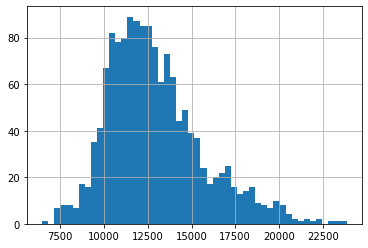

In [41]:
# now let's load the trained model

lin_model = joblib.load('linear_regression.joblib') 

# let's obtain the predictions
pred = lin_model.predict(data)

# let's plot the predicted sale prices
pd.Series(np.exp(pred)).hist(bins=50)

In [43]:
for p in pred:
    print(p)

9.254448402234015
9.366773207188546
9.423508149064215
9.547311826518433
9.57242991094969
9.414213512115401
9.531565612939492
9.4126930814589
9.59244904497444
9.258392471730518
9.568109896149505
9.245458485534595
9.18973842261606
9.452468550538203
9.33446654766304
9.771624331637204
9.56796214409832
9.794128208246766
9.731334913363792
9.939128571837843
9.818702705612349
9.626287448668577
9.403881120761984
9.547963793251615
9.593843720158551
9.524614812354756
9.707013548428668
9.61798704591857
9.434756165647707
9.601286531167124
9.513480712203863
9.161185814433086
9.561072712596204
9.670910300574203
9.718040613638454
9.66315669923725
9.449630147871776
9.52961652828959
9.515632979929745
9.465784398202615
9.471603032444818
9.480414734717234
9.728654107136302
9.652203926648745
9.594313444770423
9.459555086320767
9.580106870610845
9.450952459306611
9.408269500992379
9.30437173469984
9.340213836203041
9.4508839267846
9.307715582650347
9.284770421542012
9.427736932670198
9.390530326562413
9.573

9.443807373868625
9.442484734204436
9.717225167920498
9.752911501325075
9.702330756745177
9.652553835511872
9.713562772442273
9.39605474973034
9.445882469175494
9.474894879506076
9.440565345769178
9.590124268853408
9.529898899962179
9.641425314664463
9.479687286644824
9.295506041342339
9.319811458084423
9.248926857350769
9.331597750435872
9.352564693985256
9.406942635232674
9.21615917600621
9.478510694641388
9.41255048246365
9.56906073224684
9.324757313543662
9.618567140335145
9.34841840528548
8.897801944303357
8.9673630743211
9.324893502969823
9.351273203059876
9.316929492032488
9.46092902272131
9.493381786514085
9.387248759446036
9.279663841844659
9.46659677164201
9.223131775780447
9.435824396117523
9.201429282556045
9.34480172206613
9.227740710166081
9.434076485712652
9.255772307494434
9.338924401115282
9.319191339074823
9.348425979259924
9.135978175455536
9.255094597654603
9.301917221639508
9.176203837593011
9.160298603095638
9.36075372428871
9.423728183471846
9.378474902106861
9.3

9.549066991275664
9.32275785099964
9.298437736509811
9.294864928139479
9.529552459453111
9.361156195994647
9.576422984542695
9.487240826515922
9.444295876828152
9.185477522013676
9.195218016444976
9.153173251873032
9.263148887057774
9.081474830954487
8.882921591753282
9.231718755362081
9.170533136476722
9.355372324905112
9.590567146642654
9.385257446307106
9.486491012315962
9.254975579269678
9.120823875773592
9.292997545542848
9.396560506463723
9.536907440210035
9.638910806284507
9.45688153135841
9.515278724527397
9.265320031850244
9.440508157081856
8.959660530191172
9.101049687230972
9.27909397839128
8.973354242257262
9.179550652432539
8.945592289200196
9.837186945804357
9.777731464459835
9.517328753324298
9.344193035600153
9.535210476378174
9.449036006341009
9.536831301642556
9.509866103172108
9.800385198605516
9.872205809247436
8.929184181109365
9.707669625790167
9.305942074393231
9.338669908022984
9.355596593475816
9.195873112402227
9.10432609428011
9.320516013083383
9.136908897720